## Percentiles

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_excel("/content/Monthly_income.xlsx", names=['name','income'])
df

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [ ]:
df.describe()

,income
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


In [ ]:
df.income.quantile(0.25) #Average of 6000 and 4000

5500.0

In [ ]:
df.income.quantile(0.75, interpolation='higher') #Higher value

8000

In [ ]:
df.income.quantile(1)

10000000.0

In [ ]:
percentile_99= df.income.quantile(0.99)
percentile_99

9400479.999999994

In [ ]:
df[df.income>percentile_99]

,name,income
6,Elon Musk,10000000


In [ ]:
df[df.income<=percentile_99]

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000


# Dealing with Null Values

In [ ]:
df['income'][3]=np.NaN
df

<ipython-input-28-51632406605e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'][3]=np.NaN


,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [ ]:
df[df.isnull().any(axis=1)]

,name,income
3,Sofia,NaN


In [ ]:
df.income.mean()

1671666.6666666667

In [ ]:
df_new= df.fillna(df.income.mean())
df_new

,name,income
0,Rob,5.000000e+03
1,Rafiq,6.000000e+03
2,Nina,4.000000e+03
3,Sofia,1.671667e+06
4,Mohan,8.000000e+03
5,Tao,7.000000e+03
6,Elon Musk,1.000000e+07


In [ ]:
df_new= df.fillna(df.income.median())
df_new

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [ ]:
NY= pd.read_csv('/content/AB_NYC_2019.csv')
NY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
NY.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
min_threshold, max_threshold= NY.price.quantile([0.01, 0.999])
print(min_threshold, max_threshold)

30.0 3000.0


In [ ]:
#Removing Outliers in Price
NY_new= NY[(NY.price>min_threshold) & (NY.price<max_threshold)]
NY_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
NY_new.price.describe()

count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64

# Outlier removal using IQR

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_excel('/content/sample_data/name_height.xlsx')
df

,name,Height
0,A,1.2
1,B,2.5
2,C,3.2
3,Ram,4.9
4,Seetha,5.1
5,Laxman,5.3
6,Vijay,5.4
7,John,5.6
8,Max,5.8
9,Gwen,5.9


In [ ]:
df.describe()

,Height
count,19.000000
mean,8.778947
std,9.809722
min,1.200000
25%,5.200000
50%,5.900000
75%,6.400000
max,40.300000


In [ ]:
Q1, Q3= df.Height.quantile(0.25), df.Height.quantile(0.75)
Q1, Q3

(5.199999999999999, 6.4)

In [ ]:
IQR= Q3-Q1
IQR

1.200000000000001

In [ ]:
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
print(lower_limit)
print(upper_limit)

3.3999999999999977
8.200000000000003


In [ ]:
df[(df.Height>lower_limit)&(df.Height<upper_limit)]

,name,Height
3,Ram,4.9
4,Seetha,5.1
5,Laxman,5.3
6,Vijay,5.4
7,John,5.6
8,Max,5.8
9,Gwen,5.9
10,Ben,5.9
11,IronMan,6.0
12,Captain,6.1


In [ ]:
#Printing Outliers
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,name,Height
0,A,1.2
1,B,2.5
2,C,3.2
16,Antman,13.4
17,Hanuman,40.3
18,Waybig,30.5


# Normal Distribution

In [ ]:
import pandas as pd
import seaborn as sn

In [ ]:
df= pd.read_csv('/content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.drop('Weight',axis=1,inplace=True)

In [ ]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

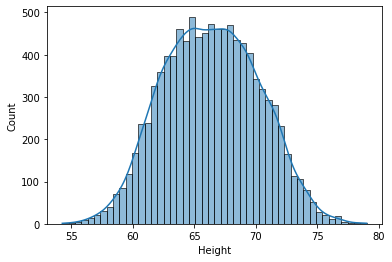

In [ ]:
#Plotting "Gaussian" using Seaborn
sn.histplot(df.Height, kde=True)

In [ ]:
mean= df.Height.mean()
mean

66.36755975482124

In [ ]:
std_deviation= df.Height.std()
std_deviation

3.8475281207732293

In [ ]:
#99.7% +-3 mean to remove outliers
lower= mean-3*std_deviation
upper= mean+3*std_deviation
lower, upper

(54.82497539250156, 77.91014411714093)

In [ ]:
#Value below 54.82 and above 77.91 are outliers
df_new=df[(df.Height>lower)&(df.Height<upper)]
df_new

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
#Outliers
df_outliers= df[(df.Height<lower)|(df.Height>upper)]
df_outliers

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [ ]:
data= pd.Series([6.2,5.7,4.6,5.4,5.9,4.3,5.1,5.2,4.9])
data.describe()

count    9.000000
mean     5.255556
std      0.614636
min      4.300000
25%      4.900000
50%      5.200000
75%      5.700000
max      6.200000
dtype: float64

# Z score

In [ ]:
df['z_score']= (df.Height-df.Height.mean())/df.Height.std()
df.head()

,Gender,Height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [ ]:
#Z score value greater than 3 is an outlier
df.Height.mean()

66.36755975482124

In [ ]:
df.Height.std()

3.8475281207732293

In [ ]:
df[(df.z_score>3)|(df.z_score<-3)] #Outliers using Z score

,Gender,Height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
df_new_zscore= df[(df.z_score<3)&(df.z_score>-3)] 
df_new_zscore

,Gender,Height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


# Logarithm

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df= pd.read_csv('https://github.com/codebasics/math-for-machine-learning/raw/main/5_log_normal_distribution/income.csv',names=['income','count'],skiprows=1)
df.head()

,income,count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


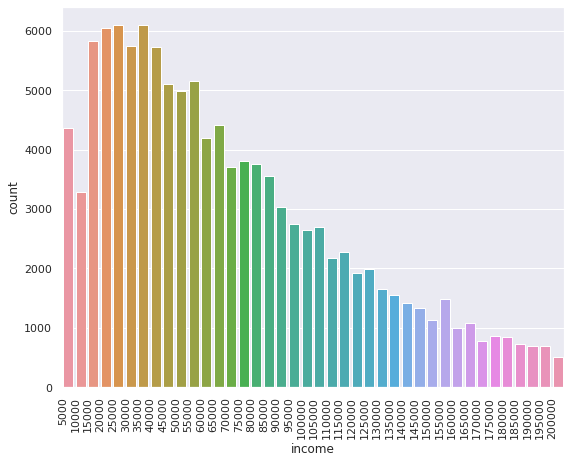

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
g= sns.barplot(x='income',y='count',data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right');

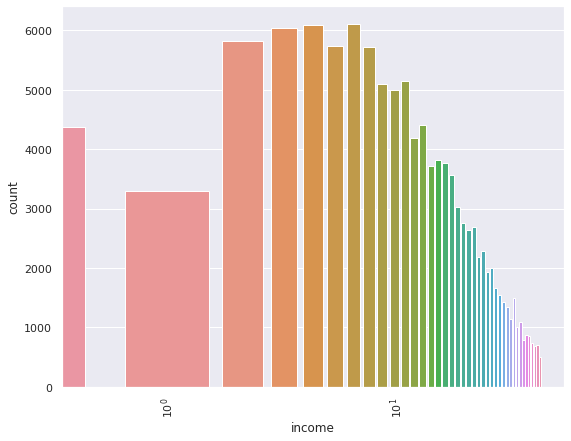

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
g = sns.barplot(x='income',y='count',data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right');
g.set(xscale="log");

# Cosine Similarity and Cosine Distance

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
import numpy as np

In [ ]:
print(cosine_similarity([[3,1]],[[6,2]])) #similarity of High
print(np.round(cosine_distances([[3,1]],[[6,2]])))

[[1.]]
[[0.]]


In [ ]:
doc1 = """
iphone sales contributed to 70% of revenue. iphone demand is increasing by 20% yoy. 
the main competitor phone galaxy recorded 5% less growth compared to iphone"
"""

doc2 = """
The upside pressure on volumes for the iPhone 12 series, historical outperformance 
in the July-September time period heading into launch event, and further catalysts in relation
to outperformance for iPhone 13 volumes relative to lowered investor expectations implies a 
very attractive set up for the shares.
"""

doc3 = """
samsung's flagship product galaxy is able to penetrate more into asian markets compared to
iphone. galaxy is redesigned with new look that appeals young demographics. 60% of samsung revenues
are coming from galaxy phone sales
"""

doc4 = """
Samsung Electronics unveils its Galaxy S21 flagship, with modest spec improvements 
and a significantly lower price point. Galaxy S21 price is lower by ~20% (much like the iPhone 12A), 
which highlights Samsung's focus on boosting shipments and regaining market share.
"""

In [ ]:
def count_iphone(string):
  return string.lower().count('iphone')
def count_galaxy(string):
  return string.lower().count('galaxy')

In [ ]:
import pandas as pd

df= pd.DataFrame([
    {'iPhone':count_iphone(doc1), 'Galaxy': count_galaxy(doc1)},
    {'iPhone':count_iphone(doc2), 'Galaxy': count_galaxy(doc2)},
    {'iPhone':count_iphone(doc3), 'Galaxy': count_galaxy(doc3)},
    {'iPhone':count_iphone(doc4), 'Galaxy': count_galaxy(doc4)}],
    index=['doc1','doc2','doc3','doc4']
    )
df

,iPhone,Galaxy
doc1,3,1
doc2,2,0
doc3,1,3
doc4,1,2


In [ ]:
df.loc['doc1':'doc1']

,iPhone,Galaxy
doc1,3,1


In [ ]:
cosine_similarity(df.loc['doc1':'doc1'],df.loc['doc2':'doc2']) #Very Similar

array([[0.9486833]])

In [ ]:
cosine_similarity(df.loc['doc1':'doc1'],df.loc['doc3':'doc3'])  #Not Similar

array([[0.6]])

In [ ]:
cosine_distances(df.loc['doc1':'doc1'],df.loc['doc3':'doc3'])  #Not Similar

array([[0.4]])

# Modified Z score

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('https://github.com/codebasics/math-for-machine-learning/raw/main/7_modified_z_score/movie_revenues.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/14/2006,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}, {""is...",2/11/2001,28008462,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92
3,1000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,26791,[],en,Brigham City,Wes Clayton is a lawman and a bishop in a Morm...,0.280083,"[{""name"": ""Main Street Movie Company"", ""id"": 6...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/30/2001,852206,119,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Brigham City,7.3,4
4,100000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,644,"[{""id"": 310, ""name"": ""artificial intelligence""...",en,A.I. Artificial Intelligence,"A robotic boy, the first programmed to love, D...",34.035114,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",6/29/2001,235926552,146,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,David is 11 years old. He weighs 60 pounds. He...,A.I. Artificial Intelligence,6.8,1974


In [ ]:
df.revenue.describe()

count    4.600000e+01
mean     1.879289e+08
std      4.551144e+08
min      8.522060e+05
25%      2.866957e+07
50%      8.381714e+07
75%      1.382135e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [ ]:
df['revenue_mln'] = df['revenue'].apply(lambda x: x/1000000)
df.revenue_mln.describe()

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [ ]:
_, mean, std, *_ = df.revenue_mln.describe()

In [ ]:
mean

187.92889841304347

In [ ]:
std

455.1144234195408

Outlier detection using Z score

In [ ]:
def get_z_score(value, mean, std):
    return (value - mean)/std

In [ ]:
df['z_score'] = df.revenue_mln.apply(lambda x: get_z_score(x, mean, std))
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407,130.431368,-0.126336
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,28008462,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92,28.008462,-0.351385


In [ ]:
df[df.z_score>3]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929


Outlier detection using modified Z score
* we got only 1 outlier using simple Z score. Based on the kind of analysis we are doing sometimes it might be better to use modified Z score as it will return more outliers.

In [ ]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [ ]:
MAD = get_mad(df.revenue_mln)
median = np.median(df.revenue_mln)
MAD, median

(56.399542499999995, 83.8171415)

**General guideline for modified Z score is to use 3.5 as a thresold. i.e. anything that has a mod z score of 3.5 or more is an outlier**

In [ ]:
def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD

Test z score function for a sample data point

In [ ]:
get_modified_z_score(2711, median, MAD)

31.41931227648256

In [ ]:
df['mod_z_score'] = df.revenue_mln.apply(lambda x: get_modified_z_score(x, median, MAD))
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929,32.339762
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407,130.431368,-0.126336,0.557474
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92,28.008462,-0.351385,-0.667434


In [ ]:
df[df.mod_z_score>3.5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929,32.339762
7,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,124,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,1513.528810,2.912674,17.098375
12,25000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,619,"[{""id"": 1156, ""name"": ""sister sister relations...",en,The Bodyguard,A former Secret Service agent grudgingly takes...,26.576385,"[{""name"": ""Tig Productions"", ""id"": 335}, {""nam...",...,129,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never let her out of your sight. Never let you...,The Bodyguard,6.1,661,411.006740,0.490158,3.912964


# Linear Algebra

In [ ]:
#Dot Product
def dot_product(x,y):
  return sum(i*j for i,j in zip(x,y))

result = dot_product(x=[1,3,-5], y=[4,-2,-1])
print(result)

3


In [ ]:
#Norm of the vector
import math
def norm_vector(v):
  dot_product= sum(i*i for i in v)
  return math.sqrt(dot_product)

norm_vector([-1,-2,3,4,5])

7.416198487095663

In [ ]:
#Matrix operations
def matrix_addition(x,y):
    xrows, xcols= (len(x),len(x[0]))
    yrows, ycols= (len(y),len(y[0]))     #Addition
    if xrows!=yrows or xcols!=ycols:
        print("Sum is not defined as the matrices have diff order")
    else:
        z=x
        for i in range(xrows):
            for j in range(xcols):
                z[i][j]=x[i][j]+y[i][j]
        return z
        
x=[[2,3],[1,4]]
y=[[5,4],[2,-1]]

result= matrix_addition(x,y)
print(result)

#Using Numpy
import numpy as np
x=np.array([[2,3],[1,4]])
y=np.array([[5,4],[2,-1]])
print(x+y)

[[7, 7], [3, 3]]
[[7 7]
 [3 3]]


In [ ]:
#scalar operations
def scalar(c, X):
  cX= X
  for i in range(len(X)):
    for j in range(len(X[0])):
      cX[i][j]=c*cX[i][j]
  return cX
print(scalar(3,[[2,4,5],[1,2,3]]))

#Using numpy
import numpy as np
a=np.array([[2,4,5],[1,2,3]])
print(3*a)

[[6, 12, 15], [3, 6, 9]]
[[ 6 12 15]
 [ 3  6  9]]


In [ ]:
#Matrix Multiplication
def multiply_matrices(mat1, mat2):
    xrows,xcols  = len(mat1),len(mat1[0])
    yrows,ycols = len(mat2),len(mat2[0])

    if xcols != yrows:
        raise ValueError("The number of columns in the first matrix must be equal to the number of rows in the second matrix.")
    result = [[0 for j in range(ycols)] for i in range(xrows)]

    for i in range(xrows):
        for j in range(ycols):
            for k in range(xcols):
                result[i][j] += mat1[i][k] * mat2[k][j]
    
    return result

# Example usage
mat1 = [[1, 2, 3], [4, 5, 6]]
mat2 = [[7, 8], [9, 10], [11, 12]]
print(multiply_matrices(mat1, mat2))

#Using numpy
mat1 = np.array([[1, 2, 3], [4, 5, 6]])
mat2 = np.array([[7, 8], [9, 10], [11, 12]])
print(np.dot(mat1,mat2))


[[58, 64], [139, 154]]
[[ 58  64]
 [139 154]]


In [ ]:
#Transpose of Matrix
def transpose(x):
  rows= len(x)
  cols= len(x[0])
  z= [[0 for i in range(rows)]for j in range(cols)]
  for i in range(cols):
    for j in range(rows):
      z[i][j]=x[j][i]
  return z
x=[[1,2,3],[4,5,6]]
print(transpose(x))

#Using numpy
x= np.array(x)
print(np.transpose(x))

[[1, 4], [2, 5], [3, 6]]
[[1 4]
 [2 5]
 [3 6]]


# Measure of Central Tendency & Dispersion

In [ ]:
#Mean
import statistics
statistics.mean([4,5,-8,3,-1,9])

2

In [ ]:
statistics.median([4,5,-8,3,-1,9])

3.5

In [ ]:
statistics.mode([5,-8,5,3,-1,9])

5

In [ ]:
#Range
max= max(4,5,-8,3,-1,9)
min= min(4,5,-8,3,-1,9)
max-min

17

In [ ]:
#Standard Deviation
import statistics
statistics.stdev([4,5,-8,3,-1,9])

5.865151319446072

# Skewness

In [ ]:
import numpy as np
from statsmodels.stats.stattools import roburt_skewness

x= np.array([2,4,5,7,8,9,11,15])
skewness= medcouple(x)

ImportError: ignored

# Covariance and Correlation

In [ ]:
import numpy as np

array1 = np.array([3,1,4])

array2 = np.array([5,1,3])

covariance = np.cov(array1, array2)[0][1]
covariance

2.0

In [ ]:
import math
def mean(arr, n):
 
    sum = 0
    for i in range(0, n):
        sum = sum + arr[i]
 
    return sum / n
 
# Function to find covariance.
def covariance(arr1, arr2, n):
 
    sum = 0
    mean_arr1 = mean(arr1, n)
    mean_arr2 = mean(arr2, n)
    for i in range(0, n):
        sum = (sum + (arr1[i] - mean_arr1) * (arr2[i] - mean_arr2))
 
    return sum / (n - 1)
 
 
# Driver method
arr1 = [3,1,4]
n = len(arr1)
arr2 = [5,1,3]
m = len(arr2)
 
if (m == n):
    print(covariance(arr1, arr2, m))


2.0


# Probability Distributions

1. Binomial Distribution

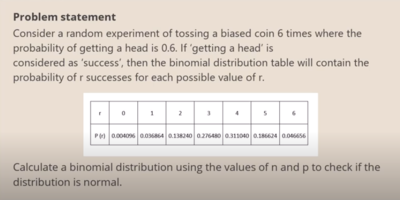

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
#Values of n and p
n= 6
p= 0.6

In [5]:
#list of r values
r_values= list(range(n+1))

#Mean and Variance
mean, var= binom.stats(n,p)

#list of pmf values
dist= [binom.pmf(r,n,p) for r  in  r_values]

#Printing the Table
print('r\tp(r)')
for i in range(n+1):
  print(str(r_values[i])+'\t'+str(dist[i]))

r	p(r)
0	0.0040960000000000015
1	0.03686400000000002
2	0.1382400000000001
3	0.2764800000000001
4	0.3110400000000001
5	0.1866240000000001
6	0.04665599999999999


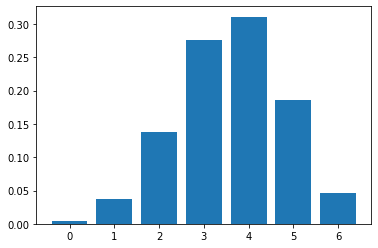

In [6]:
plt.bar(r_values, dist)
plt.show()

2. Poisson Distribution

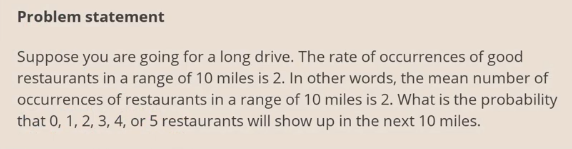

In [7]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [8]:
x=[0,1,2,3,4,5]
lmbda= 2

In [9]:
poisson_pd= poisson.pmf(x, lmbda)

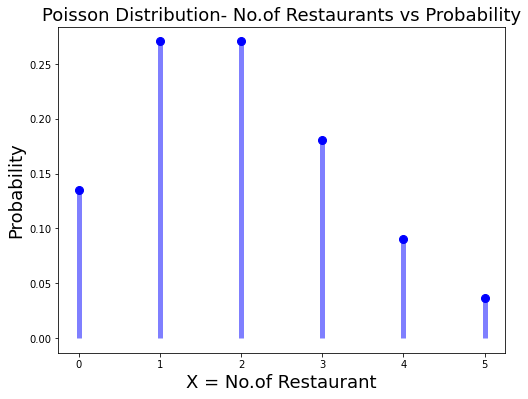

In [11]:
fig, ax= plt.subplots(1, 1, figsize=(8,6))
ax.plot(x, poisson_pd, 'bo', ms=8, label= 'poisson pmf')
plt.ylabel("Probability",fontsize="18")
plt.xlabel("X = No.of Restaurant", fontsize="18")
plt.title("Poisson Distribution- No.of Restaurants vs Probability", fontsize="18")
ax.vlines(x,0,poisson_pd, colors='b',lw=5,alpha=0.5)